# Netflix Sentiment Analysis and Prediction

By Carter Ekberg

In [1]:
import pandas as pd
import numpy as np
import csv
import snscrape.modules.twitter as sntwitter
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
pd.set_option('display.max_colwidth', None)

In [2]:
# !pip install snscrape

In [3]:
# !pip install vaderSentiment

In [4]:
# !pip install yfinance --upgrade --no-cache-dir

In [4]:
# set dates to create individual csv files for each day
start_date = '2022-04-10'
end_date = '2022-04-11'

In [164]:
# loading 2000 tweets per day between 4/11 and 4/22 regarding Netflix keyword

# https://urldefense.com/v3/__https://medium.datadriveninvestor.com/how-to-build-a-twitter-scraping-app-with-python
# -b3fc069a19c6*5Cn__;JQ!!DeIc-uvKXH9G!5T9CbaEqjUZdNgpKYalRx5XoU3s8gU2y6eKQSVr-6WS_2Q1CTrH0mP8asxTfF6kBC5BOfhqtUlGIcOeiDS_g2RciMuCe4iTT$ 

keyword = 'Netflix'
maxTweets = 2000

# Iterate over all days one at a time
for i in range(1, 13):
    start_date = dt.datetime.strftime(dt.datetime.strptime(start_date, '%Y-%m-%d') + timedelta(days=1), '%Y-%m-%d')
    end_date = dt.datetime.strftime(dt.datetime.strptime(end_date, '%Y-%m-%d') + timedelta(days=1), '%Y-%m-%d')

    # Open/create a file to append data to
    csvFile = open('Netflix' + str(i).zfill(2) + '.csv', 'a', newline='', encoding='utf8')
    csvFile.truncate(0)
    csvWriter = csv.writer(csvFile)

    # Initialize scraper object
    scraper = sntwitter.TwitterSearchScraper(keyword + ' lang:en since:' +  start_date +
                                             ' until:' + end_date + ' -filter:links')

    # Iterate over tweet info and write to csv
    for i, tweet in enumerate(scraper.get_items()):
        if i >= maxTweets :
            break
        csvWriter.writerow([tweet.id, tweet.date, tweet.user, tweet.content, tweet.likeCount,
                            tweet.retweetCount, tweet.quoteCount, tweet.replyCount])
    csvFile.close()

In [5]:
# Read all CSVs into one df
days = pd.DataFrame()
for i in range(1, 13):
    df = pd.read_csv('Netflix' + str(i).zfill(2) + '.csv', header=None).assign(day=i+10)
    days = pd.concat([days, df])
days.reset_index(drop=True, inplace=True)
days.columns = ['id', 'date', 'user', 'content', 'likes', 'retweets', 'quotes', 'replies', 'day']
days

,id,date,user,content,likes,retweets,quotes,replies,day
0,1513668213938307074,2022-04-11 23:59:59+00:00,https://twitter.com/simesanony2,"@xtinethomas01 @KEdge23 So they have never watched the plethora of cooking programmes or seen the range of food on the internet.\n\nI accept they have probably never read a book and rely on a diet of Netflix and Facebook but it's all there for the finding.\n\nI don't buy the lack of knowledge, it's laziness",1,0,0,1,11
1,1513668179855220743,2022-04-11 23:59:51+00:00,https://twitter.com/IanMcGraw1000,@netflix Netflix you really have me staring at a clock the whole day,7,0,0,0,11
2,1513668177506574342,2022-04-11 23:59:50+00:00,https://twitter.com/King_Zulair,Netflix finally brought back Blade 😌,0,0,0,0,11
3,1513668167662460930,2022-04-11 23:59:48+00:00,https://twitter.com/TheLastDiety32,Netflix shows be half-way thru production and get canceled 😞 like gahhhhh damn bitch 😂😂,0,0,0,0,11
4,1513668161111007242,2022-04-11 23:59:46+00:00,https://twitter.com/Christo62584173,@elonmusk Currently watching your film on Netflix... I would to shake your mother fucking hand. What a guy you are 🔥🔥 I hope you are doing well you LEGEND! 👑,0,0,0,0,11
...,...,...,...,...,...,...,...,...,...
23995,1517637581021736960,2022-04-22 22:52:50+00:00,https://twitter.com/ThatDollSally,Finished The Ultimatum and I have questions like how much culpability does Netflix have for not intervening when they clearly saw one of the cast is an emotional abuser? And why are they holding this up as a good relationship?,1,0,0,0,22
23996,1517637576940695552,2022-04-22 22:52:49+00:00,https://twitter.com/jeffreybmcconne,"@VeteranAmi @bpugpug7 The subject is: Elon Musk says ""woke mind virus is making Netflix unwatchable."" \n\nVery true but I'm not cancelling Netflix, I just don't choose to select their original content which I find to be hateful, tribal, violent, obscene and deprived.\n\nNot American values.",1,0,0,1,22
23997,1517637569613385728,2022-04-22 22:52:47+00:00,https://twitter.com/ItsAnAutumn,heartstopper netflix mention ///\n\nGYS GUYS I ONLY WATCHED LIKE 10 MINUTES AND IM SO INLOVE I SQUEALED WHEN THEY SAID HI TO EACHOTHER HELP,4,0,0,1,22
23998,1517637568849846272,2022-04-22 22:52:47+00:00,https://twitter.com/slut4rkive,HEARTSTOPPER IS ON NETFLIX OMFG,1,0,0,0,22


In [3]:
# setting up sentiment analyser and checking first 5 scores.

analyser = SentimentIntensityAnalyzer()
scores = [analyser.polarity_scores(tweet) for tweet in days['content']]
scores[0:5]

[{'neg': 0.0, 'neu': 0.926, 'pos': 0.074, 'compound': 0.5012},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.698, 'pos': 0.302, 'compound': 0.3818},
 {'neg': 0.331, 'neu': 0.42, 'pos': 0.249, 'compound': -0.3182},
 {'neg': 0.161, 'neu': 0.621, 'pos': 0.218, 'compound': 0.5081}]

In [6]:
# adding the scores to our data frame.

days = pd.concat([days, pd.DataFrame(scores)], axis=1)
days

,id,date,user,content,likes,retweets,quotes,replies,day,neg,neu,pos,compound
0,1513668213938307074,2022-04-11 23:59:59+00:00,https://twitter.com/simesanony2,"@xtinethomas01 @KEdge23 So they have never watched the plethora of cooking programmes or seen the range of food on the internet.\n\nI accept they have probably never read a book and rely on a diet of Netflix and Facebook but it's all there for the finding.\n\nI don't buy the lack of knowledge, it's laziness",1,0,0,1,11,0.000,0.926,0.074,0.5012
1,1513668179855220743,2022-04-11 23:59:51+00:00,https://twitter.com/IanMcGraw1000,@netflix Netflix you really have me staring at a clock the whole day,7,0,0,0,11,0.000,1.000,0.000,0.0000
2,1513668177506574342,2022-04-11 23:59:50+00:00,https://twitter.com/King_Zulair,Netflix finally brought back Blade 😌,0,0,0,0,11,0.000,0.698,0.302,0.3818
3,1513668167662460930,2022-04-11 23:59:48+00:00,https://twitter.com/TheLastDiety32,Netflix shows be half-way thru production and get canceled 😞 like gahhhhh damn bitch 😂😂,0,0,0,0,11,0.331,0.420,0.249,-0.3182
4,1513668161111007242,2022-04-11 23:59:46+00:00,https://twitter.com/Christo62584173,@elonmusk Currently watching your film on Netflix... I would to shake your mother fucking hand. What a guy you are 🔥🔥 I hope you are doing well you LEGEND! 👑,0,0,0,0,11,0.161,0.621,0.218,0.5081
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,1517637581021736960,2022-04-22 22:52:50+00:00,https://twitter.com/ThatDollSally,Finished The Ultimatum and I have questions like how much culpability does Netflix have for not intervening when they clearly saw one of the cast is an emotional abuser? And why are they holding this up as a good relationship?,1,0,0,0,22,0.074,0.719,0.207,0.6662
23996,1517637576940695552,2022-04-22 22:52:49+00:00,https://twitter.com/jeffreybmcconne,"@VeteranAmi @bpugpug7 The subject is: Elon Musk says ""woke mind virus is making Netflix unwatchable."" \n\nVery true but I'm not cancelling Netflix, I just don't choose to select their original content which I find to be hateful, tribal, violent, obscene and deprived.\n\nNot American values.",1,0,0,1,22,0.333,0.563,0.105,-0.9584
23997,1517637569613385728,2022-04-22 22:52:47+00:00,https://twitter.com/ItsAnAutumn,heartstopper netflix mention ///\n\nGYS GUYS I ONLY WATCHED LIKE 10 MINUTES AND IM SO INLOVE I SQUEALED WHEN THEY SAID HI TO EACHOTHER HELP,4,0,0,1,22,0.000,0.775,0.225,0.7695
23998,1517637568849846272,2022-04-22 22:52:47+00:00,https://twitter.com/slut4rkive,HEARTSTOPPER IS ON NETFLIX OMFG,1,0,0,0,22,0.000,1.000,0.000,0.0000


In [9]:
# number of days having a compound score of 0. We want to exclude these scores as they are meaningless to us.
(days.compound == 0).sum()

6859

In [10]:
# excluding the 0 compound scores.

days_no0 = days.loc[days['compound'] != 0]
days_no0

,id,date,user,content,likes,retweets,quotes,replies,day,neg,neu,pos,compound
0,1513668213938307074,2022-04-11 23:59:59+00:00,https://twitter.com/simesanony2,"@xtinethomas01 @KEdge23 So they have never watched the plethora of cooking programmes or seen the range of food on the internet.\n\nI accept they have probably never read a book and rely on a diet of Netflix and Facebook but it's all there for the finding.\n\nI don't buy the lack of knowledge, it's laziness",1,0,0,1,11,0.000,0.926,0.074,0.5012
2,1513668177506574342,2022-04-11 23:59:50+00:00,https://twitter.com/King_Zulair,Netflix finally brought back Blade 😌,0,0,0,0,11,0.000,0.698,0.302,0.3818
3,1513668167662460930,2022-04-11 23:59:48+00:00,https://twitter.com/TheLastDiety32,Netflix shows be half-way thru production and get canceled 😞 like gahhhhh damn bitch 😂😂,0,0,0,0,11,0.331,0.420,0.249,-0.3182
4,1513668161111007242,2022-04-11 23:59:46+00:00,https://twitter.com/Christo62584173,@elonmusk Currently watching your film on Netflix... I would to shake your mother fucking hand. What a guy you are 🔥🔥 I hope you are doing well you LEGEND! 👑,0,0,0,0,11,0.161,0.621,0.218,0.5081
7,1513668109118365696,2022-04-11 23:59:34+00:00,https://twitter.com/DimSartz_,"@ATeens2Toonies @ReginaldShoe42 @OneStepJourney @jroman951 @MacRumors As correctly said, you can’t access the Netflix video player at all without subscribing. If you do, you don’t have to pay extra for PiP like with a higher tier. On YouTube on the other hand, accessing the video player is for free",2,0,0,0,11,0.026,0.809,0.165,0.8225
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23993,1517637617139003395,2022-04-22 22:52:58+00:00,https://twitter.com/SpicyAlonzo,"@Bastouzze @LonelyGoomba Even if you used Netflix it wasn't to watch movies dawg cmon, they've been stuffed full with b movie shit for years and not even the good kind 😪",13,0,0,0,22,0.156,0.755,0.089,-0.3830
23995,1517637581021736960,2022-04-22 22:52:50+00:00,https://twitter.com/ThatDollSally,Finished The Ultimatum and I have questions like how much culpability does Netflix have for not intervening when they clearly saw one of the cast is an emotional abuser? And why are they holding this up as a good relationship?,1,0,0,0,22,0.074,0.719,0.207,0.6662
23996,1517637576940695552,2022-04-22 22:52:49+00:00,https://twitter.com/jeffreybmcconne,"@VeteranAmi @bpugpug7 The subject is: Elon Musk says ""woke mind virus is making Netflix unwatchable."" \n\nVery true but I'm not cancelling Netflix, I just don't choose to select their original content which I find to be hateful, tribal, violent, obscene and deprived.\n\nNot American values.",1,0,0,1,22,0.333,0.563,0.105,-0.9584
23997,1517637569613385728,2022-04-22 22:52:47+00:00,https://twitter.com/ItsAnAutumn,heartstopper netflix mention ///\n\nGYS GUYS I ONLY WATCHED LIKE 10 MINUTES AND IM SO INLOVE I SQUEALED WHEN THEY SAID HI TO EACHOTHER HELP,4,0,0,1,22,0.000,0.775,0.225,0.7695


In [11]:
# assigning a score of 0 for positive compound scores, and a score of 1 for negative compound scores.
# checking the new shape of our dataframe

days_no0 = days_no0.assign(score=np.where(days_no0['compound'] > 0, 0, 1))
days_no0.shape

(17141, 14)

In [12]:
# reference
neg_words = ['lose', 'cancel', 'password', 'price', 'plan', 'ad', 'stock', 'subsrcib']

In [13]:
# creating neg_tweet column using topic modeling below.
# we pulled common words from the topic modeling that would have a typical negative connotation within tweets.
# for example, a negative tweet may have to do with "cancelling subcriptions", or the dipping "stock" price.
# Negative score gets a 1 and positve gets a zero

days_no0 = days_no0.assign(neg_tweet=np.where((days_no0['content'].str.contains('lose') |
                                               days_no0['content'].str.contains('cancel') |
                                               days_no0['content'].str.contains('password') |
                                               days_no0['content'].str.contains('price') | 
                                               days_no0['content'].str.contains('plan')  |
                                               days_no0['content'].str.contains('stock') |
                                               days_no0['content'].str.contains('subscrib')), 1, 0))

In [14]:
# number of negative tweets
days_no0.neg_tweet.sum()

1862

In [15]:
(days_no0.neg_tweet == days_no0.score).mean()

0.6258094626917916

In [16]:
# checking dataframe
days_no0.head()

,id,date,user,content,likes,retweets,quotes,replies,day,neg,neu,pos,compound,score,neg_tweet
0,1513668213938307074,2022-04-11 23:59:59+00:00,https://twitter.com/simesanony2,"@xtinethomas01 @KEdge23 So they have never watched the plethora of cooking programmes or seen the range of food on the internet.\n\nI accept they have probably never read a book and rely on a diet of Netflix and Facebook but it's all there for the finding.\n\nI don't buy the lack of knowledge, it's laziness",1,0,0,1,11,0.000,0.926,0.074,0.5012,0,0
2,1513668177506574342,2022-04-11 23:59:50+00:00,https://twitter.com/King_Zulair,Netflix finally brought back Blade 😌,0,0,0,0,11,0.000,0.698,0.302,0.3818,0,0
3,1513668167662460930,2022-04-11 23:59:48+00:00,https://twitter.com/TheLastDiety32,Netflix shows be half-way thru production and get canceled 😞 like gahhhhh damn bitch 😂😂,0,0,0,0,11,0.331,0.420,0.249,-0.3182,1,1
4,1513668161111007242,2022-04-11 23:59:46+00:00,https://twitter.com/Christo62584173,@elonmusk Currently watching your film on Netflix... I would to shake your mother fucking hand. What a guy you are 🔥🔥 I hope you are doing well you LEGEND! 👑,0,0,0,0,11,0.161,0.621,0.218,0.5081,0,0
7,1513668109118365696,2022-04-11 23:59:34+00:00,https://twitter.com/DimSartz_,"@ATeens2Toonies @ReginaldShoe42 @OneStepJourney @jroman951 @MacRumors As correctly said, you can’t access the Netflix video player at all without subscribing. If you do, you don’t have to pay extra for PiP like with a higher tier. On YouTube on the other hand, accessing the video player is for free",2,0,0,0,11,0.026,0.809,0.165,0.8225,0,1


In [17]:
# developing average sentiment scores by day. (4/11/22 - 4/22/22), before the stock crashed and after.

score_by_day = days.groupby('day')[['neg', 'neu', 'pos', 'compound']].mean()
score_by_day

,neg,neu,pos,compound
day,,,,
11,0.066070,0.811103,0.122826,0.134012
12,0.068213,0.816968,0.114818,0.111923
13,0.063543,0.802457,0.133998,0.180205
14,0.067166,0.810852,0.121978,0.142359
15,0.073695,0.814461,0.111842,0.109852
16,0.077697,0.812575,0.109735,0.098675
17,0.072620,0.808624,0.118749,0.116685
18,0.073180,0.803624,0.123195,0.135079
19,0.082189,0.815173,0.102644,0.078409


In [18]:
# obtaining Netlflix ($NFLX) stock history from 4/11/22 - 4/22/22.
import yfinance as yf

nflx = yf.Ticker("NFLX")

# get stock info
nflx.info

# get historical market data
hist = nflx.history(start='2022-04-11', end='2022-04-23')
hist['day'] = [11, 12, 13, 14, 18, 19, 20, 21, 22]
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits,day
Date,,,,,,,,
2022-04-11,350.000000,354.779999,345.200012,348.000000,3777100,0,0,11
2022-04-12,355.910004,359.410004,342.250000,344.100006,3824300,0,0,12
2022-04-13,343.920013,352.000000,341.160004,350.429993,3231000,0,0,13
2022-04-14,350.950012,352.000000,339.859985,341.130005,4343800,0,0,14
2022-04-18,340.000000,342.359985,331.619995,337.859985,5105000,0,0,18
2022-04-19,333.220001,351.679993,333.220001,348.609985,20906900,0,0,19
2022-04-20,245.199997,248.699997,212.509995,226.190002,133387500,0,0,20
2022-04-21,220.000000,227.679993,211.520004,218.220001,53501600,0,0,21
2022-04-22,220.179993,226.270004,210.050003,215.520004,37515100,0,0,22


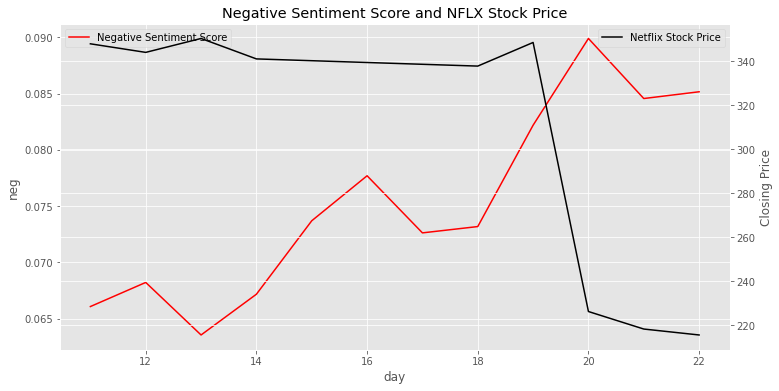

In [19]:
# showing correlation between stock price and negative sentiment.

plt.figure(figsize=(12,6))
sns.lineplot(data=score_by_day, x='day', y='neg', color='red', label='Negative Sentiment Score')
ax2 = plt.twinx()
sns.lineplot(data=hist, x='day', y='Close', ax=ax2, color='black', label='Netflix Stock Price')
plt.title('Negative Sentiment Score and NFLX Stock Price')
plt.ylabel('Closing Price')
plt.xlabel('Day')
plt.show();

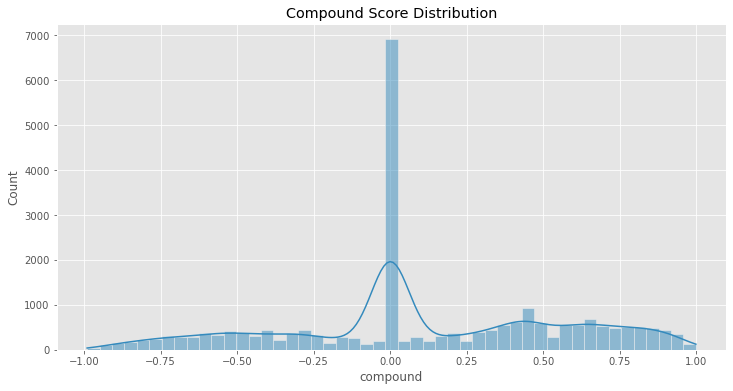

In [20]:
# showing distribution of compound scores. The data is fairly balanced, normally distributed around 0.
plt.figure(figsize=(12,6))
sns.histplot(data=days, x='compound', kde=True)
plt.title('Compound Score Distribution');

# Predicting Stock Price based on Sentiment

In [21]:
# Create df with sentiments scores and closing prices
stocks = score_by_day.merge(hist[['day', 'Close']], on='day')
stocks.head()

In [32]:
# Slice just two columns of interest
Xy = stocks[['neg', 'Close']]
Xy

,neg,Close
0,0.066070,348.000000
1,0.068213,344.100006
2,0.063543,350.429993
3,0.067166,341.130005
4,0.073180,337.859985
5,0.082189,348.609985
6,0.089902,226.190002
7,0.084562,218.220001
8,0.085164,215.520004


In [33]:
import statsmodels.formula.api as smf
from sklearn import linear_model

In [35]:
# Run the regression
# Not that accurate with only 9 data points, just want to show correlation
reg_02 = smf.ols('Close ~ neg', data=stocks).fit()
reg_02.summary()

C:\Users\carte\Anaconda3\lib\site-packages\scipy\stats\stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     14.89
Date:                Mon, 09 May 2022   Prob (F-statistic):            0.00622
Time:                        18:18:52   Log-Likelihood:                -44.356
No. Observations:                   9   AIC:                             92.71
Df Residuals:                       7   BIC:                             93.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    697.1533    102.840      6.779      0.000     453.975     940.331
neg        -5212.3043   1350.823     -3.859      0.006   -8406.493   -2018.115
==============================================================================
Omnibus:                        7.467   Durbin-Watson:                   1.256
Prob(Omnibus):                  0.024   Jarque-Bera (JB):                2.579
Skew:                           1.209   Prob(JB):                        0.275
Kurtosis:                       4.013   Cond. No.                         108.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
# Put predictions in a df to see comparison
# Predictions are pretty close
Xy_results = Xy.assign(predicted_close = reg_02.predict(Xy[['neg']]))
Xy_results

,neg,Close,predicted_close
0,0.066070,348.000000,352.773782
1,0.068213,344.100006,341.603813
2,0.063543,350.429993,365.947881
3,0.067166,341.130005,347.063702
4,0.073180,337.859985,315.714298
5,0.082189,348.609985,268.756649
6,0.089902,226.190002,228.556752
7,0.084562,218.220001,256.387851
8,0.085164,215.520004,253.255256


In [39]:
from sklearn.metrics import r2_score
# Same R^2 as above
print('R2: ', r2_score(y_true=Xy_results['Close'], y_pred=Xy_results['predicted_close']))

R2:  0.6802032023404472


# Topic Modeling

In [42]:
# importing libraries
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import re

In [43]:
# Stole this from site below
# Defining functions to clean the tweets
def remove_links(tweet):
    '''Takes a string and removes web links from it'''
    tweet = re.sub(r'http\S+', '', tweet) # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet) # rempve bitly links
    tweet = tweet.strip('[link]') # remove [links]
    return tweet

def remove_users(tweet):
    '''Takes a string and removes retweet and @user information'''
    tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove retweet
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove tweeted at
    return tweet

In [44]:
# https://urldefense.com/v3/__https://ourcodingclub.github.io/tutorials/topic-modelling-python/*5Cn__;JQ!!DeIc-uvKXH9G!5T9CbaEqjUZdNgpKYalRx5XoU3s8gU2y6eKQSVr-6WS_2Q1CTrH0mP8asxTfF6kBC5BOfhqtUlGIcOeiDS_g2RciMjseTSiN$ 
my_stopwords = nltk.corpus.stopwords.words('english')
word_rooter = nltk.stem.snowball.PorterStemmer(ignore_stopwords=False).stem
my_punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@'

# cleaning master function
def clean_tweet(tweet, bigrams=False):
    tweet = remove_users(tweet)
    tweet = remove_links(tweet)
    tweet = tweet.lower() # lower case
    tweet = re.sub('['+my_punctuation + ']+', ' ', tweet) # strip punctuation
    tweet = re.sub('\s+', ' ', tweet) #remove double spacing
    tweet = re.sub('([0-9]+)', '', tweet) # remove numbers
    tweet_token_list = [word for word in tweet.split(' ')
                            if word not in my_stopwords] # remove stopwords

    tweet_token_list = [word_rooter(word) if '#' not in word else word
                        for word in tweet_token_list] # apply word rooter
    if bigrams:
        tweet_token_list = tweet_token_list+[tweet_token_list[i]+'_'+tweet_token_list[i+1]
                                            for i in range(len(tweet_token_list)-1)]
    tweet = ' '.join(tweet_token_list)
    return tweet

In [46]:
# Construct new column for clean tweets
days['clean_tweet'] = days.content.apply(clean_tweet)
days.head()

,id,date,user,content,likes,retweets,quotes,replies,day,neg,neu,pos,compound,clean_tweet
0,1513668213938307074,2022-04-11 23:59:59+00:00,https://twitter.com/simesanony2,"@xtinethomas01 @KEdge23 So they have never watched the plethora of cooking programmes or seen the range of food on the internet.\n\nI accept they have probably never read a book and rely on a diet of Netflix and Facebook but it's all there for the finding.\n\nI don't buy the lack of knowledge, it's laziness",1,0,0,1,11,0.000,0.926,0.074,0.5012,never watch plethora cook programm seen rang food internet accept probabl never read book reli diet netflix facebook find buy lack knowledg lazi
1,1513668179855220743,2022-04-11 23:59:51+00:00,https://twitter.com/IanMcGraw1000,@netflix Netflix you really have me staring at a clock the whole day,7,0,0,0,11,0.000,1.000,0.000,0.0000,netflix realli stare clock whole day
2,1513668177506574342,2022-04-11 23:59:50+00:00,https://twitter.com/King_Zulair,Netflix finally brought back Blade 😌,0,0,0,0,11,0.000,0.698,0.302,0.3818,netflix final brought back blade 😌
3,1513668167662460930,2022-04-11 23:59:48+00:00,https://twitter.com/TheLastDiety32,Netflix shows be half-way thru production and get canceled 😞 like gahhhhh damn bitch 😂😂,0,0,0,0,11,0.331,0.420,0.249,-0.3182,netflix show half way thru product get cancel 😞 like gahhhhh damn bitch 😂😂
4,1513668161111007242,2022-04-11 23:59:46+00:00,https://twitter.com/Christo62584173,@elonmusk Currently watching your film on Netflix... I would to shake your mother fucking hand. What a guy you are 🔥🔥 I hope you are doing well you LEGEND! 👑,0,0,0,0,11,0.161,0.621,0.218,0.5081,current watch film netflix would shake mother fuck hand guy 🔥🔥 hope well legend 👑


In [47]:
from sklearn.feature_extraction.text import CountVectorizer

# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(min_df=20, stop_words=['netflix'], strip_accents='ascii', token_pattern='\w+|\$[\d\.]+|\S+')

# apply transformation
tf = vectorizer.fit_transform(days['clean_tweet']).toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()

In [83]:
from sklearn.decomposition import LatentDirichletAllocation

number_of_topics = 4

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

In [84]:
model.fit(tf)

LatentDirichletAllocation(n_components=4, random_state=0)

In [85]:
# Stolen function, displays topics
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)

In [242]:
# Displaying our topics 
no_top_words = 6
topics = display_topics(model, tf_feature_names, no_top_words)
topics

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights
0,watch,508.6,subscrib,364.6,ad,469.9,share,342.7
1,show,313.7,time,256.6,price,255.4,subscrib,207.9
2,like,256.2,first,235.9,plan,234.1,content,205.6
3,movi,228.1,stock,175.6,cancel,227.3,password,202.2
4,get,191.8,lose,149.5,stream,212.4,price,190.0
5,good,179.9,year,148.8,support,206.2,disney,175.6


In [48]:
# lose, cancel, password, price, plan, ad, stock, subsrcib
# Picked words that are in negative topics and created `neg_tweet` column

## Machine Learning Implementation
### Predicting whether a tweet is negative or not.
#### We decided on negative words within tweets to create a binary score column (0 positive, 1 negative). Words included [lose, cancel, password, price, plan, ad, stock, and subscribe]

In [25]:
# importing Machine Learning libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder

In [193]:
# Create df with columns of interest for Machine Learning
df = days_no0[['neg', 'neu', 'pos', 'neg_tweet', 'score']]

In [194]:
df.head()

,neg,neu,pos,neg_tweet,score
0,0.000,0.926,0.074,0,0
2,0.000,0.698,0.302,0,0
3,0.331,0.420,0.249,1,1
4,0.161,0.621,0.218,0,0
7,0.026,0.809,0.165,1,0


In [195]:
X=df.iloc[:,0:-1].values
y=df.iloc[:,-1].values
le = LabelEncoder()
y=le.fit_transform(y)

In [196]:
# Creating train & test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    stratify=y, 
                                                    random_state=1)

### Perceptron

In [197]:
ppn = Perceptron(max_iter=50, eta0=0.05, random_state=1)

In [198]:
ppn.fit(X_train, y_train)

Perceptron(eta0=0.05, max_iter=50, random_state=1)

In [199]:
y_pred = ppn.predict(X_test)

In [200]:
accuracy_score(y_test, y_pred)

0.9113444152814232

In [201]:
from sklearn.metrics import confusion_matrix

In [202]:
conf_m = pd.DataFrame(confusion_matrix(y_test, ppn.predict(X_test)), index = ['Actual Negative', 'Actual Positive'],
                      columns = ['Predicted Negative', 'Predicted Positive'])
conf_m

,Predicted Negative,Predicted Positive
Actual Negative,1829,304
Actual Positive,0,1296


### Logistic Regression

In [203]:
lr = LogisticRegression(C=100.0, random_state=1)

In [204]:
lr.fit(X_train, y_train)

LogisticRegression(C=100.0, random_state=1)

In [205]:
y_pred = lr.predict(X_test)

In [206]:
accuracy_score(y_test, y_pred)

0.9833770778652668

In [208]:
conf_m = pd.DataFrame(confusion_matrix(y_test, lr.predict(X_test)), index = ['Actual Negative', 'Actual Positive'],
                      columns = ['Predicted Negative', 'Predicted Positive'])
conf_m

,Predicted Negative,Predicted Positive
Actual Negative,2104,29
Actual Positive,28,1268


### SVM

In [105]:
svc = SVC(kernel='linear', C=1.0, random_state=1)

In [106]:
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(svc.score(X_test, y_test))

0.9813356663750364


In [107]:
kfold = StratifiedKFold(n_splits=10).split(X_train, y_train)
scores=[]

for k, (train,test) in enumerate(kfold):
    svc.fit(X_train[train], y_train[train])
    score=svc.score(X_train[test], y_train[test])
    scores.append(score)
    print('Fold: %2d, Class dis.: %s, Acc: %.3f' % (k+1, np.bincount(y_train[train]), score))

print('\nCV accuracy:%.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Fold:  1, Class dis.: [7675 4665], Acc: 0.988
Fold:  2, Class dis.: [7675 4665], Acc: 0.982
Fold:  3, Class dis.: [7676 4665], Acc: 0.985
Fold:  4, Class dis.: [7676 4665], Acc: 0.981
Fold:  5, Class dis.: [7675 4666], Acc: 0.985
Fold:  6, Class dis.: [7675 4666], Acc: 0.985
Fold:  7, Class dis.: [7675 4666], Acc: 0.987
Fold:  8, Class dis.: [7675 4666], Acc: 0.989
Fold:  9, Class dis.: [7675 4666], Acc: 0.977
Fold: 10, Class dis.: [7675 4666], Acc: 0.978

CV accuracy:0.984 +/- 0.004


In [108]:
from sklearn.model_selection import cross_val_score 

scores = cross_val_score(estimator=svc,
                        X=X_train,
                        y=y_train,
                        cv=10,
                        n_jobs=1)
print(np.mean(scores))

0.9837366800424453
